<!-- HTML file automatically generated from DocOnce source (https://github.com/doconce/doconce/)
doconce format html exercisesweek35.do.txt  -->
<!-- dom:TITLE: Exercises week 35 -->

# Exercises week 35
**August 28-September 1, 2023**

Date: **Deadline is Friday September 3 at midnight**

## Exercise 1: Analytical exercises

In this exercise we derive the expressions for various derivatives of
products of vectors and matrices. Such derivatives are central to the
optimization of various cost functions. Although we will often use
automatic differentiation in actual calculations, to be able to have
analytical expressions is extremely helpful in case we have simpler
derivatives as well as when we analyze various properties (like second
derivatives) of the chosen cost functions.  Vectors are always written
as boldfaced lower case letters and matrices as upper case boldfaced
letters. You will find useful the notes from week 35 on derivatives of vectors and matrices.

Show that

$$
\frac{\partial (\boldsymbol{b}^T\boldsymbol{a})}{\partial \boldsymbol{a}} = \boldsymbol{b},
$$

and

$$
\frac{\partial (\boldsymbol{a}^T\boldsymbol{A}\boldsymbol{a})}{\partial \boldsymbol{a}} = \boldsymbol{a}^T(\boldsymbol{A}+\boldsymbol{A}^T),
$$

and

$$
\frac{\partial \left(\boldsymbol{x}-\boldsymbol{A}\boldsymbol{s}\right)^T\left(\boldsymbol{x}-\boldsymbol{A}\boldsymbol{s}\right)}{\partial \boldsymbol{s}} = -2\left(\boldsymbol{x}-\boldsymbol{A}\boldsymbol{s}\right)^T\boldsymbol{A},
$$

and finally find the second derivative of this function with respect to the vector $\boldsymbol{s}$. If we replace the vector $\boldsymbol{s}$ with the unknown parameters $\boldsymbol{\beta}$ used to define the ordinary least squares method, we end up with the equations that determine these parameters. The matrix $\boldsymbol{A}$ is then the design matrix $\boldsymbol{X}$ and $\boldsymbol{x}$ here has to be replaced with the outputs $\boldsymbol{y}$.

The second derivative of the mean squared error is then proportional to the so-called Hessian matrix $\boldsymbol{H}=\boldsymbol{X}^T\boldsymbol{X}$.

**Hint**: In these exercises it is always useful to write out with summation indices the various quantities.
As an example, consider the function

$$
f(\boldsymbol{x}) =\boldsymbol{A}\boldsymbol{x},
$$

which reads for a specific component $f_i$ (we define the matrix $\boldsymbol{A}$ to have dimension $n\times n$ and the vector $\boldsymbol{x}$ to have length $n$)

$$
f_i =\sum_{j=0}^{n-1}a_{ij}x_j,
$$

which leads to

$$
\frac{\partial f_i}{\partial x_j}= a_{ij},
$$

and written out in terms of the vector $\boldsymbol{x}$ we have

$$
\frac{\partial f(\boldsymbol{x})}{\partial \boldsymbol{x}}= \boldsymbol{A}.
$$

## Exercise 2: making your own data and exploring scikit-learn

We will generate our own dataset for a function $y(x)$ where $x \in
[0,1]$ and defined by random numbers computed with the uniform
distribution. The function $y$ is a quadratic polynomial in $x$ with
added stochastic noise according to the normal distribution $\cal
{N}(0,1)$.  The following simple Python instructions define our $x$
and $y$ values (with 100 data points).

In [99]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from tabulate import tabulate
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline

#Declaring functions for MSE and R2 computation 
def R2(y_data, y_model):
    return 1 - np.sum((y_data - y_model) ** 2) / np.sum((y_data - np.mean(y_data)) ** 2)


def MSE(y_data, y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

# initiating the data-set 
x = np.random.rand(100,1)
y = 2.0+5*x*x+0.1*np.random.randn(100,1)




1. Write your own code (following the examples under the [regression notes](https://compphysics.github.io/MachineLearning/doc/LectureNotes/_build/html/chapter1.html)) for computing the parametrization of the data set fitting a second-order polynomial. 

2. Use thereafter **scikit-learn** (see again the examples in the slides for week 35) and compare with your own code. Note here that **scikit-learn** does not include, by default, the intercept. See the discussions on scaling your data in the slides for this week. This type of problems appear in particular if we fit a polynomial with an intercept. 

3. Using scikit-learn, compute also the mean squared error, a risk metric corresponding to the expected value of the squared (quadratic) error defined as

╒══════════════════╤════════════╤══════════╕
│ Implementation   │        MSE │       R2 │
╞══════════════════╪════════════╪══════════╡
│ Individual       │ 0.00743459 │ 0.997094 │
├──────────────────┼────────────┼──────────┤
│ SckiKit          │ 0.00743459 │ 0.997094 │
╘══════════════════╧════════════╧══════════╛
-------------------------------------------------------- 

Mean Square Error difference: 2.6020852139652106e-18 

R2 Error difference: 0.0 



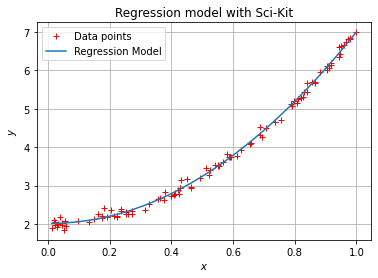

In [100]:
n = 3
X = np.zeros((len(x), n))

# Design matrix for a polynomial of degree two
X[:, 0] = 1.0
for i in range(1, n):
    X[:, i] = x[:, 0]**i

beta = (np.linalg.inv(X.T @ X) @ X.T) @ y

ypredict = X @ beta

linReg = LinearRegression()
linReg.fit(X, y)
ypredict_sklearn = linReg.predict(X)

mse_pred = MSE(y, ypredict)
mse_predsci = MSE(y, ypredict_sklearn)
r2_pred = R2(y, ypredict)
r2_predsci = R2(y, ypredict_sklearn)

col_names = ["Implementation", "MSE", "R2"]

data = [["Individual", mse_pred, r2_pred], 
        ["SckiKit", mse_predsci, r2_predsci]]

x_sorted, y_predict = zip(*sorted(zip(x, ypredict)))

x_ss, y_preds = zip(*sorted(zip(x, ypredict_sklearn)))

print(tabulate(data, headers=col_names, tablefmt="fancy_grid"))
print("-------------------------------------------------------- \n")

print(f"Mean Square Error difference: {abs(mse_pred- mse_predsci)} \n")

print(f"R2 Error difference: {abs(r2_pred- r2_predsci)} \n")

plt.plot(x, y, 'r+', label='Data points')
plt.plot(x_sorted, y_predict, label='Regression Model')
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.title('Regression model with Sci-Kit')
plt.grid()
plt.legend()
plt.show()


$$
MSE(\boldsymbol{y},\boldsymbol{\tilde{y}}) = \frac{1}{n}
\sum_{i=0}^{n-1}(y_i-\tilde{y}_i)^2,
$$

and the $R^2$ score function.
If $\tilde{\boldsymbol{y}}_i$ is the predicted value of the $i-th$ sample and $y_i$ is the corresponding true value, then the score $R^2$ is defined as

$$
R^2(\boldsymbol{y}, \tilde{\boldsymbol{y}}) = 1 - \frac{\sum_{i=0}^{n - 1} (y_i - \tilde{y}_i)^2}{\sum_{i=0}^{n - 1} (y_i - \bar{y})^2},
$$

where we have defined the mean value  of $\boldsymbol{y}$ as

$$
\bar{y} =  \frac{1}{n} \sum_{i=0}^{n - 1} y_i.
$$

You can use the functionality included in scikit-learn. If you feel for it, you can use your own program and define functions which compute the above two functions. 
Discuss the meaning of these results. Try also to vary the coefficient in front of the added stochastic noise term and discuss the quality of the fits.

### Discussion 

By clear observations, both by the presented plot, and the computed score values for the MSE and $R^2$ it`s evident that the model is accurate. The higher the $R^2$ score is the better the model is, which in this case is very high (i.e 99.7%). Though to be noted, if one increases the stochastic noise term in the model, the MSE increases and the $R^2$ score decreases where on the other hand the opposite happens if you decrease it. 

## Exercise 3: Split data in test and training data

In this exercise we want you to to compute the MSE for the training
data and the test data as function of the complexity of a polynomial,
that is the degree of a given polynomial.  

The aim is to reproduce Figure 2.11 of [Hastie et al](https://github.com/CompPhysics/MLErasmus/blob/master/doc/Textbooks/elementsstat.pdf).
Feel free to read the discussions leading to figure 2.11 of Hastie et al. 

Our data is defined by $x\in [-3,3]$ with a total of for example $n=100$ data points. You should try to vary the number of data points $n$ in your analysis.

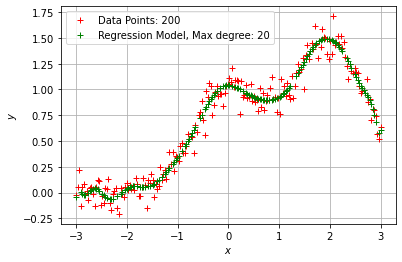

In [101]:
np.random.seed(2018) #Making the generating process of numbers more random
n = 200 #number of points
deg = 20
#Creation of the data-set
x = np.linspace(-3, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2) + np.random.normal(0, 0.1, x.shape)


def R2(y_data, y_model):
    return 1 - np.sum((y_data - y_model) ** 2) / np.sum((y_data - np.mean(y_data)) ** 2)


def MSE(y_data, y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n
    
TestError = np.zeros(deg)
TrainError = np.zeros(deg)
polydegree = np.zeros(deg)


#Design matrix for a fifth order polynomial

X = np.zeros((len(x), deg))
for i in range(0, deg):
    X[:, i] = x[:, 0]**i

#Test and training set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


beta = (np.linalg.inv(x_train.T @ x_train) @ x_train.T) @ y_train

y_tilde = x_train @ beta

y_predict = x_test @ beta


plt.plot(x,y, 'r+', label=f'Data Points: {n}')
plt.plot(x_train[:,1], y_tilde, 'g+', label=f'Regression Model, Max degree: {deg}')
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.legend()
plt.grid()
plt.show()


where $y$ is the function we want to fit with a given polynomial.

**a)**
Write a first code which sets up a design matrix $X$ defined by a fifth-order polynomial and split your data set in training and test data.

**b)**
Write thereafter (using either **scikit-learn** or your matrix inversion code using for example **numpy**)
and perform an ordinary least squares fitting and compute the mean squared error for the training data and the test data. These calculations should apply to a model given by a fifth-order polynomial.  If you compare your own code with _scikit_learn_, not that the latter does not include by default the intercept. See the discussions on scaling your data in the slides for this week.

In [102]:
linReg = LinearRegression()
linReg.fit(X, y)
ypredict_sklearn = linReg.predict(X)

mse_pred = MSE(y_train, y_tilde)
mse_predsci = MSE(y, ypredict_sklearn)
r2_pred = R2(y_train, y_tilde)
r2_predsci = R2(y, ypredict_sklearn)



col_names = ["Implementation", "MSE", "R2"]

data = [["Individual", mse_pred, r2_pred],
        ["SckiKit", mse_predsci, r2_predsci]]
        
print(tabulate(data, headers=col_names, tablefmt="fancy_grid"))
print("-------------------------------------------------------- \n")

print(f"Mean Square Error difference: {abs(mse_pred- mse_predsci)} \n")

print(f"R2 Error difference: {abs(r2_pred- r2_predsci)} \n")


╒══════════════════╤════════════╤══════════╕
│ Implementation   │        MSE │       R2 │
╞══════════════════╪════════════╪══════════╡
│ Individual       │ 0.00831721 │ 0.967959 │
├──────────────────┼────────────┼──────────┤
│ SckiKit          │ 0.00827096 │ 0.968722 │
╘══════════════════╧════════════╧══════════╛
-------------------------------------------------------- 

Mean Square Error difference: 4.6251059270197015e-05 

R2 Error difference: 0.0007631380462761461 



**c)**
Add now a model which allows you to make polynomials up to degree $15$.  Perform a standard OLS fitting of the training data and compute the MSE for the training and test data and plot both test and training data MSE as functions of the polynomial degree. Compare what you see with Figure 2.11 of Hastie et al. Comment your results. For which polynomial degree do you find an optimal MSE (smallest value)?

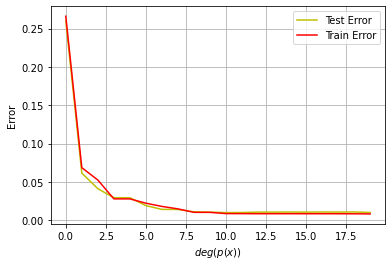

In [103]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

for degree in range(deg):
    model = make_pipeline(PolynomialFeatures(degree=degree), LinearRegression(fit_intercept=False))
    clf = model.fit(x_train_scaled, y_train)
    y_fit = clf.predict(x_train_scaled)
    y_pred = clf.predict(x_test_scaled)
    polydegree[degree] = degree
    TestError[degree] = np.mean(np.mean((y_test - y_pred)**2))
    TrainError[degree] = np.mean(np.mean((y_train - y_fit)**2))

plt.plot(polydegree, TestError, 'y',label='Test Error')
plt.plot(polydegree, TrainError, 'r', label='Train Error')
plt.xlabel(r'$deg(p(x))$')
plt.ylabel('Error')
plt.legend()
plt.grid()
plt.show()


### Discussion 

We obviously wouldn`t get the exact same picture of progressive MSE (as in Hastie) considering we do not know what type of data set or model they were using, but we do get a clear indication on where in the model we might have the best accuracy. By the plots above we can see that the approximated points are very close to the actual data points and that the $R^2$ score is again very high (around 97%) while the MSE is generally very low. There seems to be an absolute sweet spot around degrees 14-16/17. For polynomial degrees higher than 25 the dispersity rapidly changes and the model collapses which is also probably what the figure in Hastie is trying to portray.